# Plot the Sierra Nevada region and Upper Colorado region

This code prepares a spatial map of two large watersheds considered in this study.

In [6]:
# Libraries
import numpy as np
import pandas as pd
import geopandas as gp


import matplotlib.pyplot as plt

from matplotlib.patches import Polygon
from matplotlib.lines import Line2D
from mpl_toolkits.basemap import Basemap

%matplotlib inline
# Directory
idir_shp = 'D:/Project_soil_moisture/00_SM_project/05_shape/'

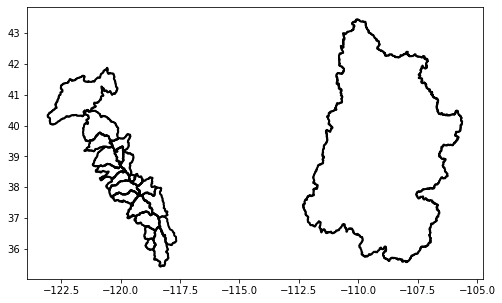

In [7]:
ax = gp.read_file(idir_shp + "Sierra_UCol.shp").plot(figsize = (10,5), facecolor = 'none', linewidth =2.)

C:\Users\sarfa\Anaconda3\envs\gwatt\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\sarfa\Anaconda3\envs\gwatt\lib\site-packages\ipykernel_launcher.py:34: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

C:\Users\sarfa\Anaconda3\envs\gwatt\lib\site-packages\ipykernel_launcher.py:34: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.



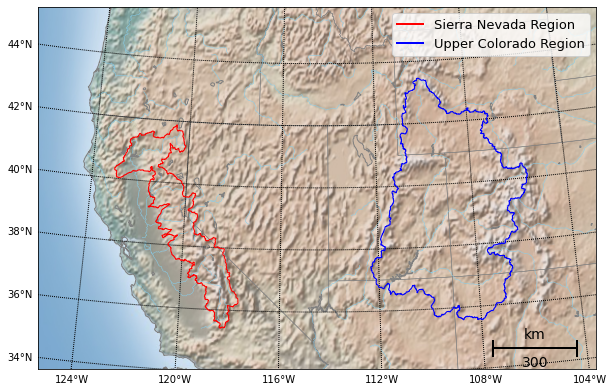

In [8]:
gdf = gp.read_file(idir_shp + "Sierra_reg_d.shp")

# # read the location shapefile
gdf.crs = {'init': 'epsg:4326'}

# 1. Draw the map background
fig = plt.figure(figsize=(10, 14))

m = Basemap(projection='lcc', resolution='h', #lcc
            lat_0=40.0, lon_0=-114.5,
            width=2.0E6, height=1.3E6)


# Add stuff to basemap 
m.shadedrelief(zorder = 0)
m.drawcoastlines(color='gray')
m.drawcountries(color='gray')
m.drawstates(color='gray')
m.drawrivers(color = "skyblue")
# m.fillcontinents(color='none',lake_color='blue')

# Draw lines of latitude and longitude. Labels are like [left,right,top,bottom]
parallels = np.arange(0.,90.,2.)
meridians = np.arange(0.,360.,4.)

m.drawparallels(parallels,labels=[True,False,True,False]) # [left,right,top,bottom]
m.drawmeridians(meridians,labels=[True,False,False,True]) # [left,right,top,bottom]

m.readshapefile((idir_shp + "Sierra_reg_d"),'Sierra Nevada Region', drawbounds=True, linewidth=1, color='r')
m.readshapefile((idir_shp + "UCol_reg"),'Upper Colorado Region', drawbounds=True, linewidth=1, color='b')


# Scalebar
m.drawmapscale(-106., 34.5,lon0=gdf.centroid.x[0], lat0=gdf.centroid.y[0], length = 300, fontsize = 14, linewidth = 2)

#====================================================
# Legend
#====================================================
# Make the first legend (upper right of map)
custom_lines = [Line2D([0], [0], color='red', lw=2),
                Line2D([0], [0], color='blue', lw=2)
               ]

plt.legend(custom_lines, ["Sierra Nevada Region", 'Upper Colorado Region'], 
                    loc = "upper right",
                    prop={'size':13})


plt.show()